<a href="https://colab.research.google.com/github/harrisb002/CS_480/blob/main/Midterm/MidtermStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
from IPython.display import Image, display

# Mount the drive
drive.mount('/content/drive')

# Define the file path
file_path = "/content/drive/My Drive/.School/CS_480/MidtermStudy/Study/pics/"

# Get images
DFS = file_path + "DFS.png"
DFS2 = file_path + "DFS2.png"
BFS = file_path + "BFS.png"
IDS = file_path + "IDS.png"
Astar2 = file_path + "A*2.png"
Astar = file_path + "A*.png"
TimeSpace = file_path + "TimeSpace.png"

AlphaBeta = file_path + "AlphaBeta.png"
AlphaBeta2 = file_path + "AlphaBeta2.png"
AlphaBeta3 = file_path + "AlphaBeta3.png"
AlphaBeta4 = file_path + "AlphaBeta4.png"

Quiz3 = file_path + "Quiz3.png"
Quiz31 = file_path + "Quiz3.1.png"

Midterm1 = file_path + "Midterm1.png"
Midterm2 = file_path + "Midterm2.png"
Midterm3 = file_path + "Midterm3.png"
Midterm4 = file_path + "Midterm4.png"
Midterm5 = file_path + "Midterm5.png"

MidtermF1 = file_path + "MidtermF1.png"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Combinatorial search

---
**Uninformed search**
 - depth-first
 - breadth-first
 - iterative deepening
 - breadth-depth

**informed search**
 - best-first
 - A*

Irrespective of the structure, the search algorithms fall into **tree search** or **graph search** version.
---

- Graph search version keeps track of previously visted nodes to avoid repeated states

## Terminology
- Completeness Implies:
  - If a solution exists, a complete search algorithm will find it.
  - If no solution exists, a complete search algorithm will terminate and correctly report that no solution is possible.
---

- Admissibility
  - Refers to a property of a heuristic function used in informed search algorithms, particularly Best First Search & A* in our case.
  - A heuristic is said to be admissible if it **never overestimates** the true cost of reaching the goal **from any given node**.

  - Formal Definition :
    - `h(n) ≤ h*(n)`
  - `h(n)` => is the heuristic estimate of the cost to reach the goal from node n
  - `h*(n)` => is the actual cost of the optimal path from node `n` to the goal.
---
- Monotonicity (also known as Consistency)
 - Stronger condition than admissibility. A heuristic is monotonic if, for any node `n` and any successor node `n'` the estimated cost of reaching the goal from `n` is no greater than the cost of reaching `n'` plus the estimated cost from `n'` to the goal. This means the heuristic obeys the triangle inequality.
  - Formal Definition:
    - A heuristic h(n) is monotonic (or consistent) if for every node n and every successor n' generated by applying an action 'a' the following holds:
      - `h(n) ≤ c(n, n') + h(n')`
    - `h(n)` => is the heuristic estimate of the cost to reach the goal from node n
    - `c(n, n')` => is the actual cost of moving from node `n` to node `n'`
    - `h(n')` => is the actual cost of the optimal path from node `n` to the goal.
  - Monotonicity ensures that as you get closer to the goal, the estimated cost **decreases or stays the same**, making sure that the total estimated cost (path cost + heuristic) never increases.

# DFS



- Complete? No.
  - If state space is not finite, the search may never terminate even if solution 2 is used. With finite state-space, both solutions will terminate.
- Time? O($b^m$) with m = maximum depth
- terrible if m is much larger than d
  - but if there are many solutions, DFS can be much faster than BFS.
- Space? O($bm$), i.e., linear space! (we only need to remember a single path + expanded unexplored nodes)
- Optimal? No (It may find a non-optimal goal first)

1.  Put the start node s on OPEN
2.  If OPEN is empty exit with failure.
3.  Remove the first node n from OPEN and place it on CLOSED.
4.  If n is a goal node, exit successfully with the solution obtained by tracing back pointers from n to s.
5.  Otherwise, expand n, generating all its successors attach to  them pointers back to n, and put them at the top of OPEN in  some order.
  - fringe = LIFO queue, i.e., put successors at front
6.  Go to step 2.

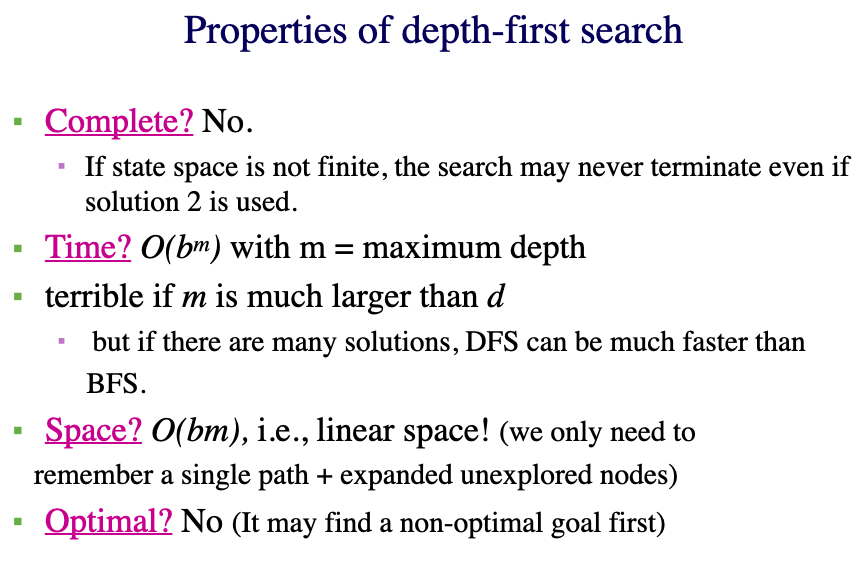

In [10]:
display(Image(DFS, height=500, width=800))

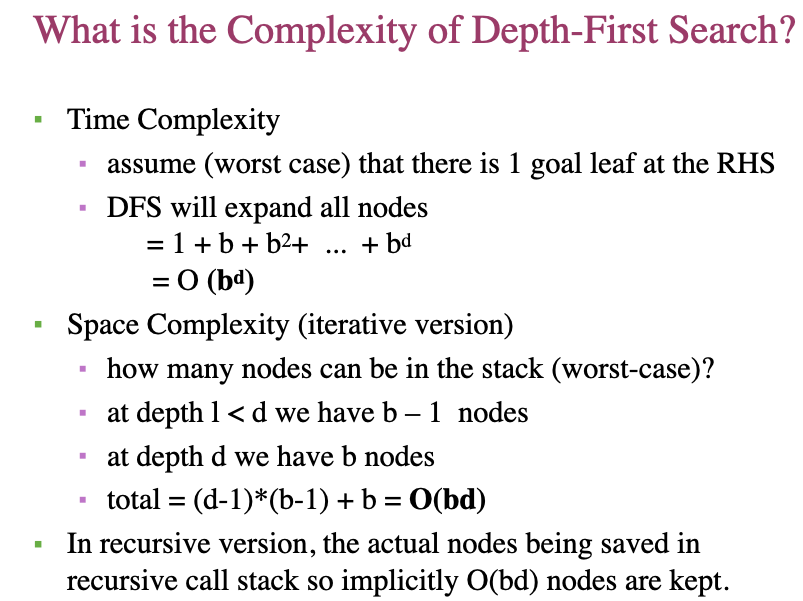

In [11]:
display(Image(DFS2, height=500, width=800))

In [ ]:
# Recursive Psuedo-version of DFS:

State DepthFirstSearch(node) {
  if (goalTest(node)) return node;
for each n in successors(node, operators)
  {
    result = DepthFirstSearch(n);
    if (result != FAIL) return result;
  }
return FAIL;
}

# BFS


---
Expand shallowest unexpanded node

- Fringe: nodes waiting in a queue to be explored, also called OPEN

- Implementation:
  - fringe is a first-in-first-out (FIFO) queue, i.e., new successors go at end of the queue.

---

- Complete (with find a solution in a finite number of steps if one exists)
- Solution Length: optimal (assuming unit cost per move)
- (Can) expand each node once (if checks for duplicates)
- Search Time: O($b^d$) which is the size of the state space
- Memory Required: O($b^d$)
- Drawback: requires space proportional to the state-space (Search time is unavoidable in the worst-case, but average case can be improved substantially.)

---

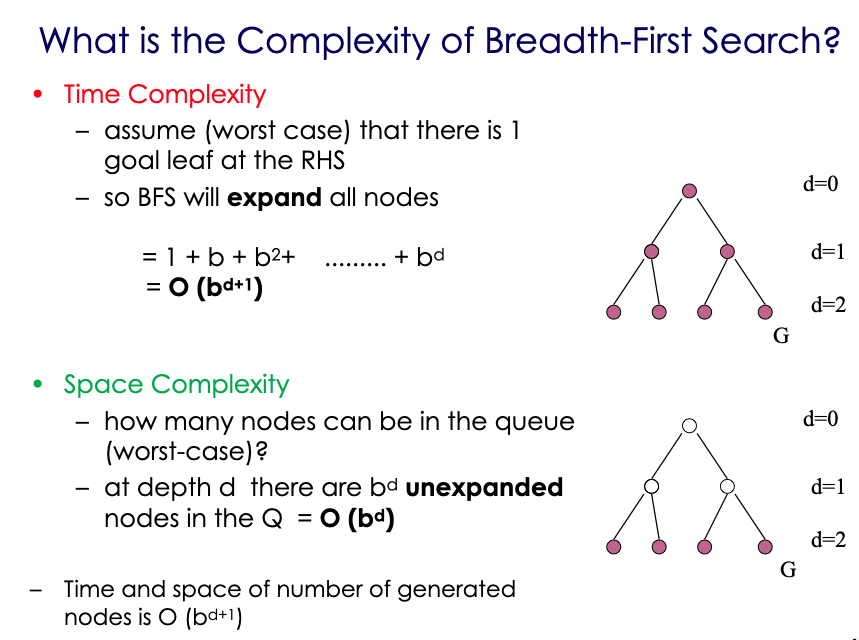

In [12]:
display(Image(BFS, height=500, width=800))

## Questions

### Finite State-Space Graph

- **Question 1: If the goal node is not reachable, is BFS guaranteed to terminate (reporting “no solution”)?**

Yes, BFS is guaranteed to terminate and report "no solution." Since the state-space is finite, BFS will eventually explore all possible nodes. If the goal node is not found after exploring all nodes, BFS can conclude that no solution exists.

- **Question 2: If the goal node is reachable, is BFS guaranteed to terminate?**

Yes, BFS is guaranteed to terminate if the goal node is reachable. Since BFS explores nodes level by level, it will eventually reach the goal node and terminate once it is found, reporting the shortest path in terms of the number of edges (or steps) from the start node.

---

### Infinite State-Space Graph

- **Question 1: If the goal node is not reachable, is BFS guaranteed to terminate (reporting “no solution”)?**

No, BFS is **not guaranteed** to terminate in an infinite state-space if the goal node is not reachable. Since there are infinitely many nodes to explore, BFS will continue expanding nodes indefinitely unless some mechanism is in place to halt it (such as a predefined depth limit).

- **Question 2: If the goal node is reachable, is BFS guaranteed to terminate?**

Yes, BFS is guaranteed to terminate if the goal node is reachable, even in an infinite state-space, provided that the goal node exists at a finite distance from the start node. BFS will explore nodes in increasing distance from the start node, so it will eventually find the goal if it is at a finite depth.

In summary, BFS terminates in both finite and infinite state spaces if the goal is reachable but may run indefinitely in an infinite state-space if the goal is unreachable.

# Comparing DFS & BFS


---
- Same  worst-case time Complexity, but
  - In the worst-case BFS is always better than DFS
  - Sometimes, on the average DFS is better if:
    - many goals, no loops and no infinite paths
- BFS is much worse memory-wise
  - DFS is linear space
  - BFS may store the whole search space.
- In general
  - BFS is better if goal is not deep, if infinite paths, if many loops, if small search space
  - DFS is better if many goals, not many loops,
  - **DFS is much better in terms of memory**

# Iterative Deepening Search

- Complete? Yes
- Time? O($b^d$)
- Space? O($bd$)
- Optimal? Yes, if step cost = 1 or increasing function of depth.
---

- Every iteration is a DFS with a depth cutoff.
**Iterative deepening (ID)**

1.  i = 1
2. While no solution do
  - DFS from initial state S0 with cutoff I
  - If found goal, stop and return solution
  - else, increment cutoff
---

Comments:
- ID implements BFS with DFS
- Only one path in memory
- So it combines the better features of BFS and DFS at a slightly higher cost than

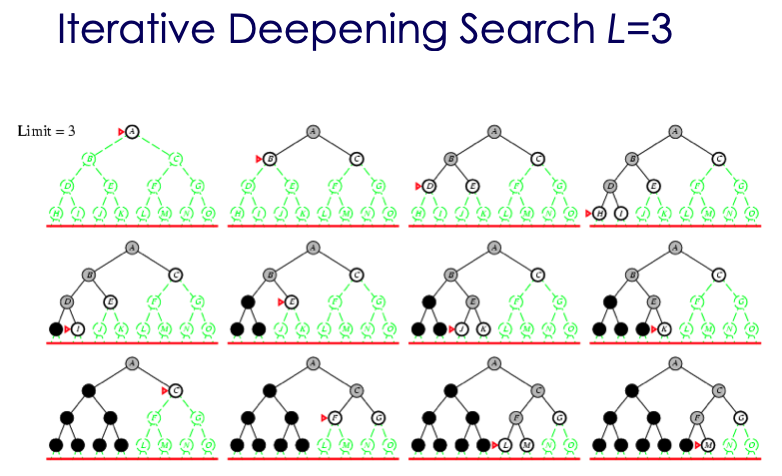

In [13]:
display(Image(IDS, height=500, width=800))

# Uniform Cost Search

An extension of BFS when applied to weighted graphs.
- Keep the total weight of the distance from start to current node associated with an open node n and expand the one with the smallest weight.
- Implemented using Priority queue:
  - Insert
  - Delete-min

- Implementation: fringe = queue ordered by path cost
  - Equivalent to breadth-first if all step costs all equal.

- Complete? Yes, if step cost ≥ ε (otherwise it can get stuck in infinite loops)

- Time? # of nodes with path cost ≤ cost of optimal solution.

- pace? # of nodes on paths with path cost ≤ cost of optimal solution
                                                                    
- Optimal? Yes, for any step cost.

Tree version
1.  Put the start node s on OPEN
2.  If OPEN is empty exit with failure.
3.  Remove the first node n from OPEN and place it on CLOSED.
4.  If n is a goal node, exit successfully with the solution obtained by tracing back pointers from n to s.
5.  Otherwise, expand n, generating all its successors attach to  them pointers back to n, and put them at the end of OPEN in  order of shortest cost from the root node
6. Go to step 2.

Graph version
1.  Put the start node s on OPEN
2.  If OPEN is empty exit with failure.
3.  Remove the first node n from OPEN and place it on CLOSED.
4.  If n is a goal node, exit successfully with the solution obtained by tracing back pointers from n to s.
5.  Otherwise, expand n, generating all its successors **not in CLOSED set**, attach to  them pointers back to n, and put them at the end of OPEN in  **order of shortest cost from the root node**
6. Go to step 2.

# Greedy search


Idea is to use an evaluation function `h(n)` for each node `n`.
- Remove from fringe a node with the smallest `h` value and add its children to the fringe.
- Repeat until the goal node leaves the fringe.
---

- Not complete
- Not optimal
- Irrevocable (this can also be its strength since it can find a solution fast.)

# Best First Search

- Idea is to avoid expanding paths that are already expensive even if the estimated distance to the goal is small

Evaluation function `f(n) = g(n) + h(n)`
- `g(n)` => cost so far to reach `n`
- `h(n)` => estimated cost from `n` to goal
- `f(n)` => estimated total cost of path through `n` to goal
---

- When best-first search is implemented with an admissible heuristic function `h(n)`, it is called A* algorithm.



---



# A*

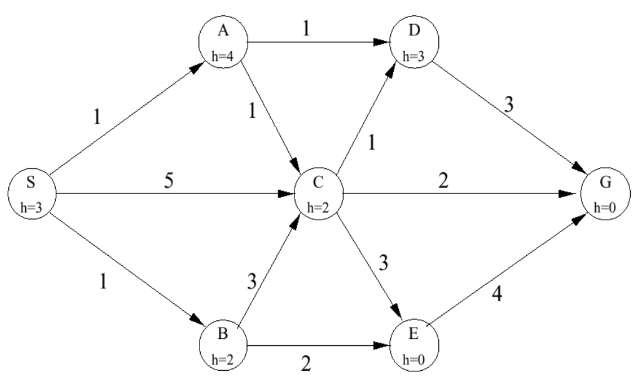

In [14]:
display(Image(Astar, height=500, width=800))

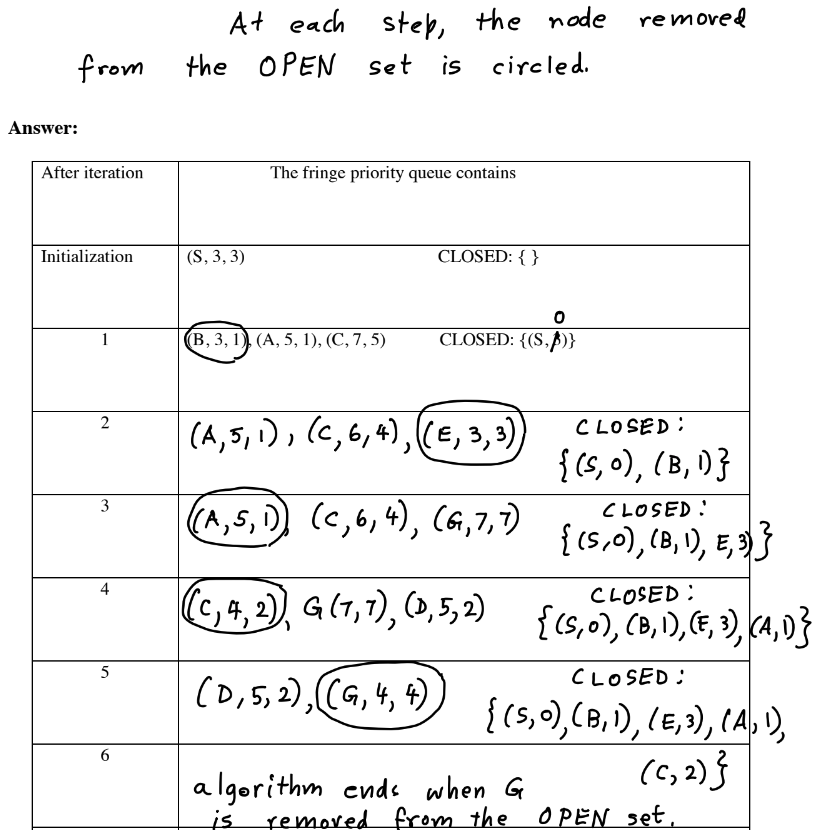

In [26]:
display(Image(Astar2, height=800, width= 1000))



---



# Comparing Search Algorithms

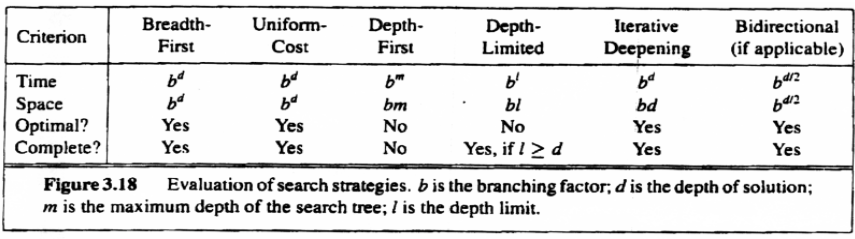

In [24]:
display(Image(TimeSpace, height=400, width=1200))



---



# Min-max Principle


- “Assume the worst”
  - say each configuration has an evaluation number
  - high numbers favor the player (the computer)
    - so we want to choose moves which maximize evaluation
  - low numbers favor the opponent
    - so they will choose moves which minimize evaluation
- Minimax Principle
  - you (the computer) assume that the opponent will choose the minimizing move next (after your move)
  - so you now choose the best move under this assumption
     i.e., the maximum (highest-value) option considering both your move and the opponent’s optimal move.



---



# Alpha Beta Procedure


- Idea:
  - Do Depth first search to generate partial game tree.
  - Give static evaluation function to leaves.
  - compute bound on internal nodes.
- Alpha, Beta bounds:
  - Alpha value for Max node means that Max real value is at
least alpha.
  - Beta for Min node means that Min can guarantee a value below Beta.
- Computation:
  - Alpha of a Max node is the maximum value of its seen children.
  - Beta of a Min node is the lowest value seen of its child node .
---

- When to Prune
  - Below a Min node whose beta value is lower than or equal to the alpha value of a max ancestor.
  - Below a Max node having an alpha value greater than or equal to the beta value of a min ancestor.
---

- How to prune the Minimax tree in the case of a static evaluation function.
  - Use two variables alpha (associated with MAX nodes) and beta (associated with MIN nodes).
  - These variables contain the best (highest or lowest, resp.) e(p) value at a node p that has been found so far.

- Notice that alpha can never decrease, and
beta can never increase.
---
- There are two rules for terminating search:
  - Search can be stopped below any MIN node having a beta value less than or equal to the alpha value of any of its MAX ancestors.
  - Search can be stopped below any MAX node having an alpha value greater than or equal to the beta value of any of its MIN ancestors.





---



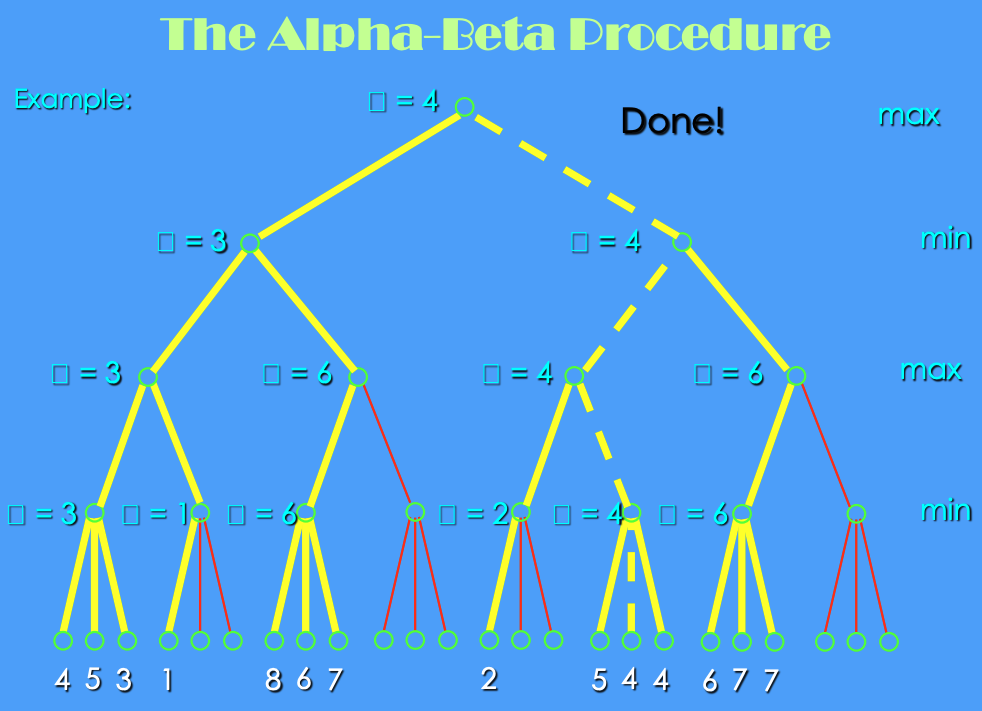

In [16]:
display(Image(AlphaBeta, height=500, width=800))

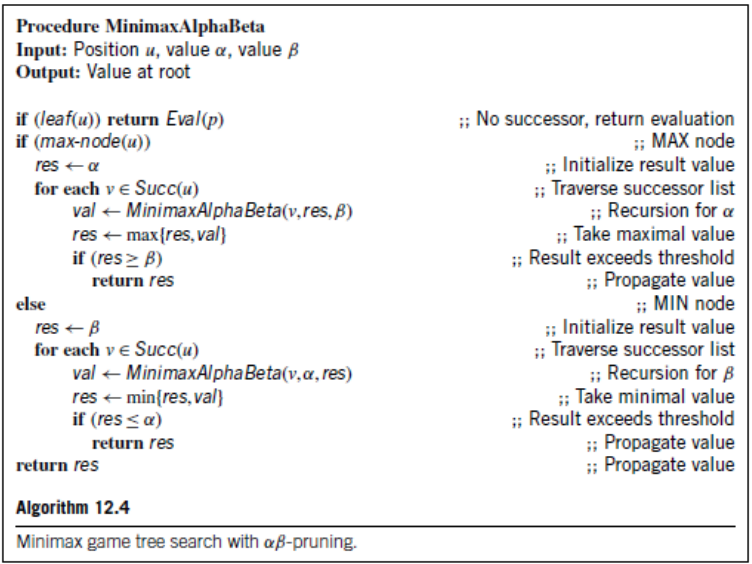

In [17]:
display(Image(AlphaBeta2, height=500, width=800))

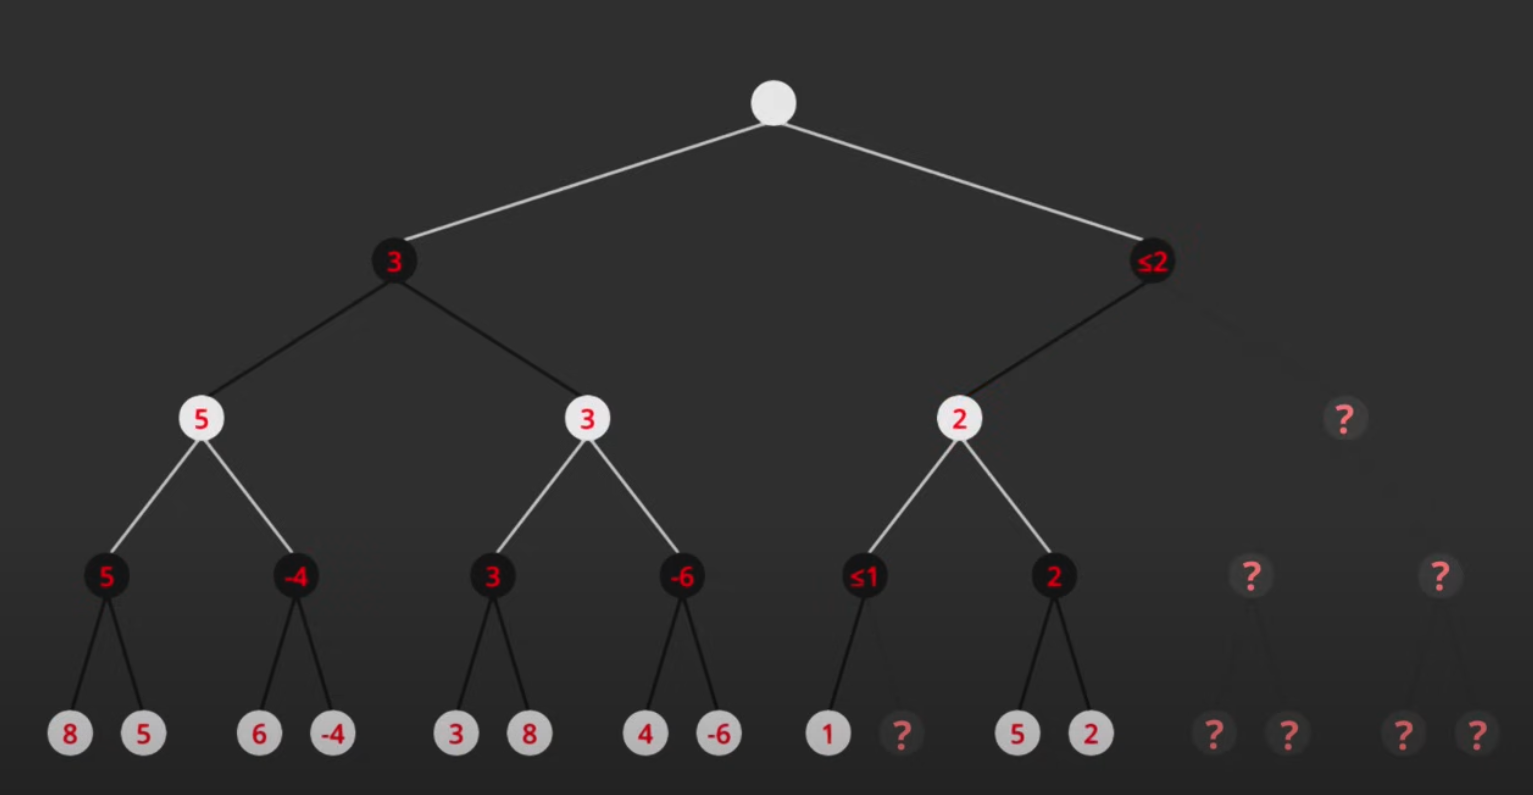

In [18]:
display(Image(AlphaBeta3, height=500, width=800))

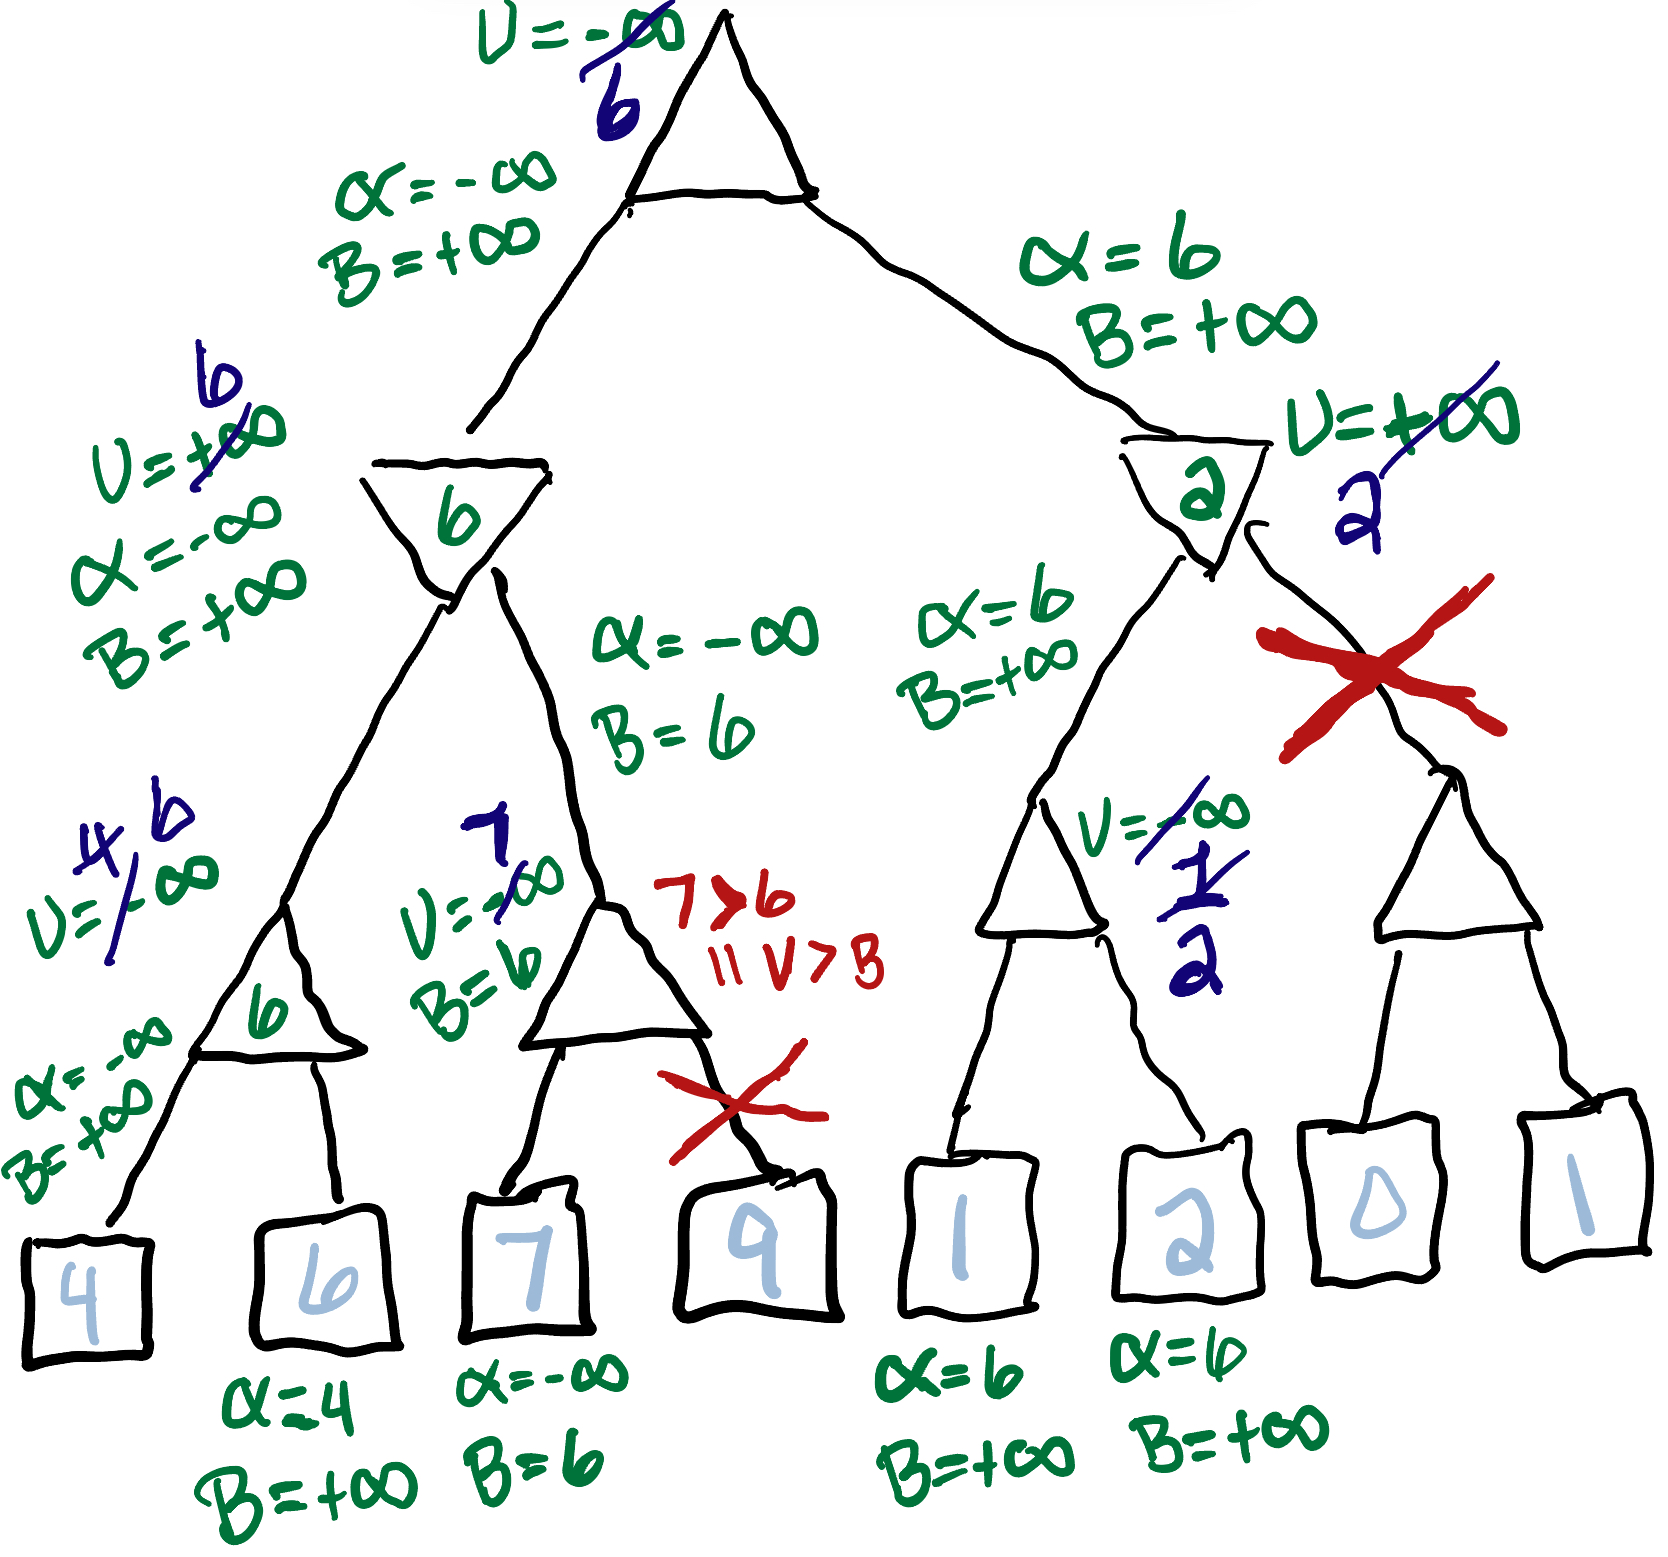

In [21]:
display(Image(AlphaBeta4, height=700, width=900))



---



# Past Quiz 3



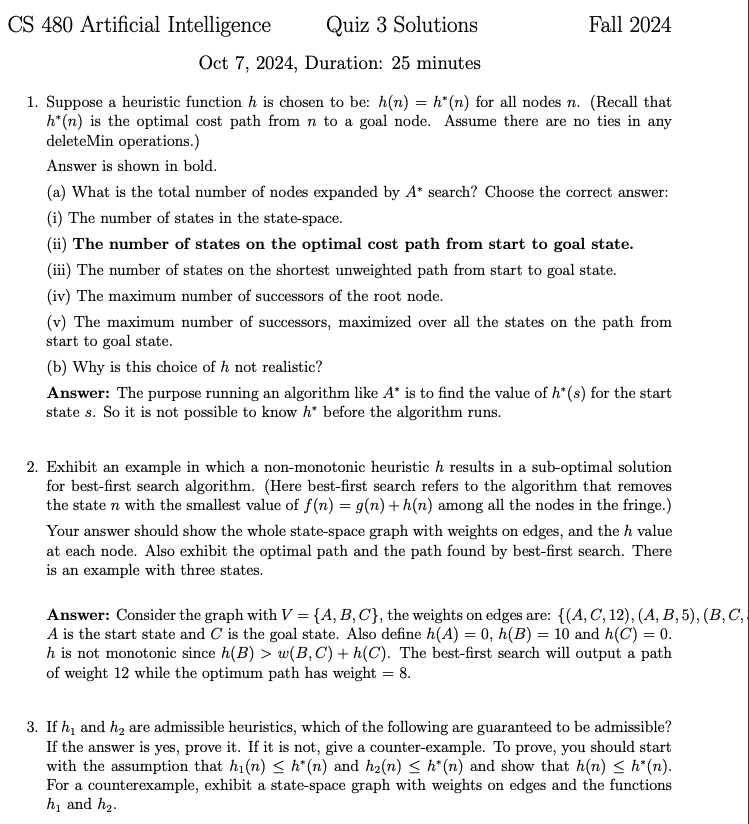

In [66]:
display(Image(Quiz3, height=700, width=800))

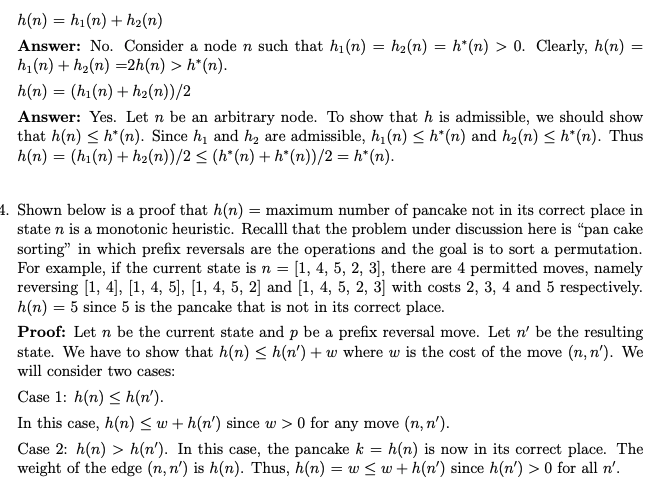

In [67]:
display(Image(Quiz31, height=700, width=800))



---



# Past Midterms


## Midterm Fall 22

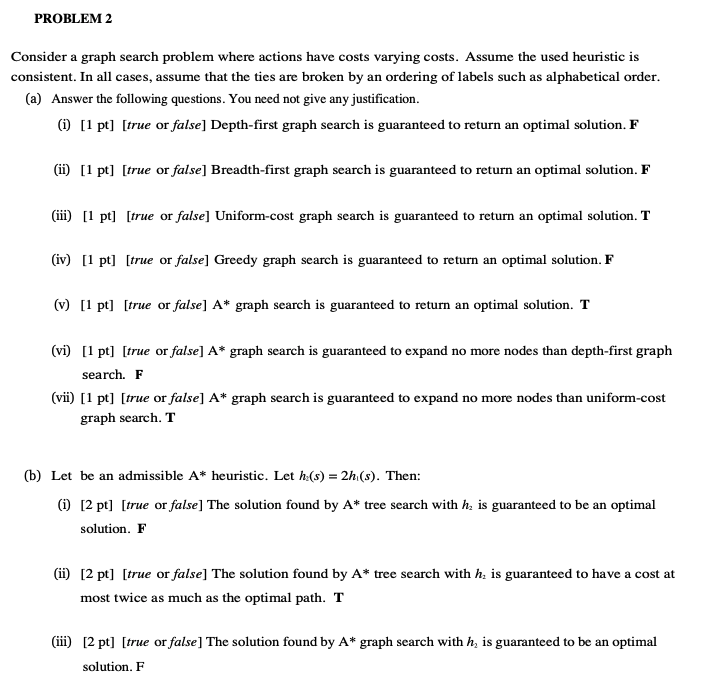

In [48]:
display(Image(Midterm1, height=700, width=800))

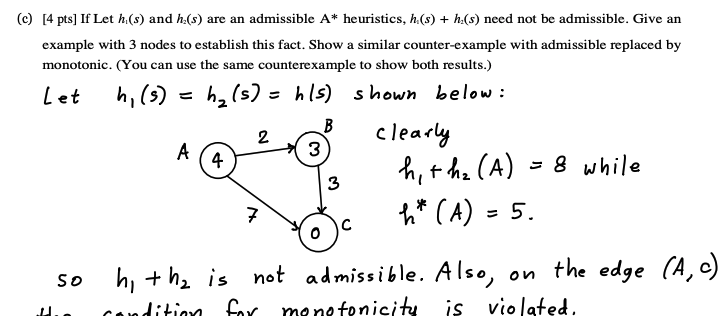

In [63]:
display(Image(Midterm2, height=600, width=900))

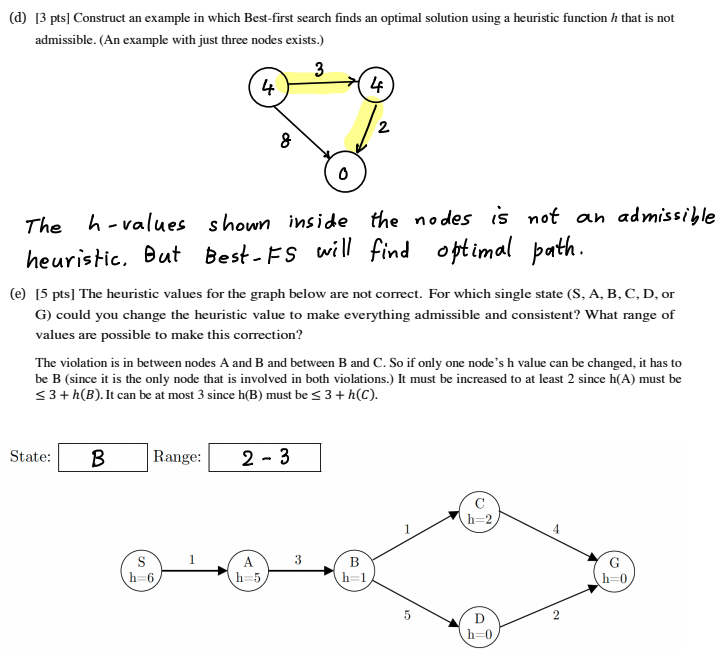

In [51]:
display(Image(Midterm3, height=700, width=800))

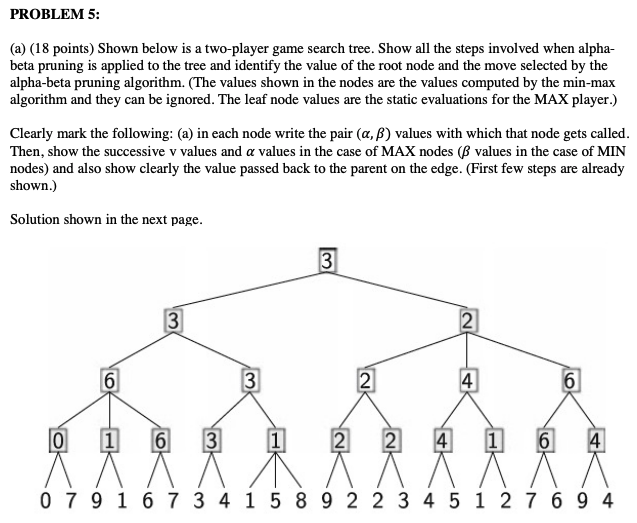

In [52]:
display(Image(Midterm4, height=600, width=800))

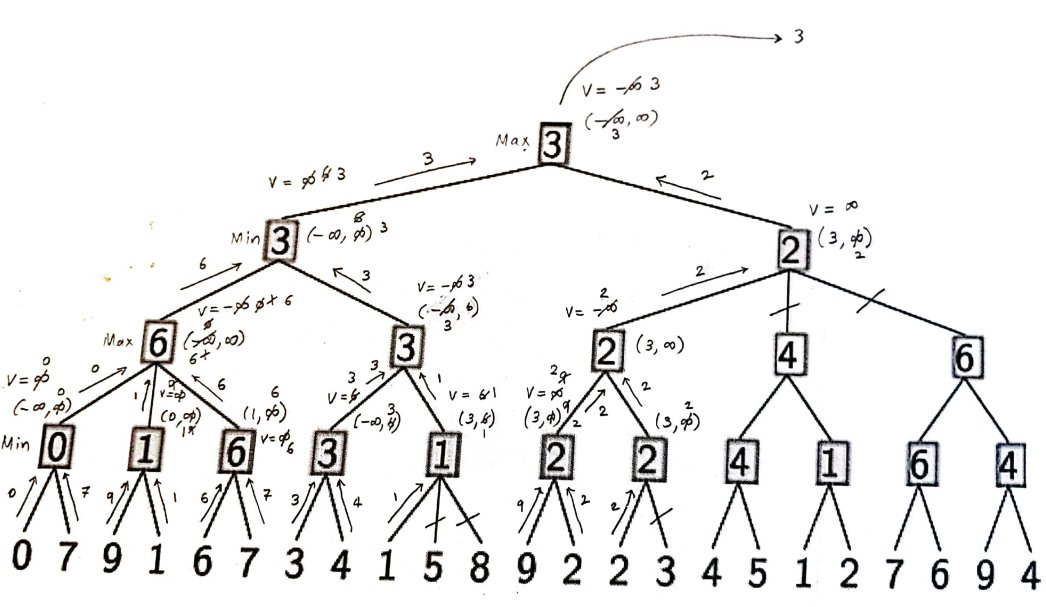

In [71]:
display(Image(Midterm5, height=700, width=1200))



---



## Midterm Fall 18

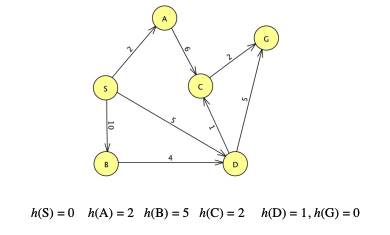

In [82]:
display(Image(MidtermF1, height=600, width=900))

### Depth-first Search:
Stack content:
- Step 1: < S >
- Step 2: < A, B, D >
- Step 3: < C, B, D >
- Step 4: < G, B >
- Step 5: < G >

Nodes expanded: < S, A, C, G >

Path returned: < S, A, C, G >


---



### Breadth-first Search:
Queue content:
- Step 1: < S >
- Step 2: < A, B, D >
- Step 3: < B, D, C >
- Step 4: < D, C >
- Step 5: < G, C >
- Step 6: < C >

Nodes expanded: < S, A, B, D, G >
Path returned: < S, D, G >


---



### Uniform-cost search:
Priority Queue content:
- Step 1: < (S, 0) >
- Step 2: < (A, 2), (B, 10), (D, 5) >
- Step 3: < (B, 10), (D, 5), (C, 8) >
- Step 4: < (B, 10), (C, 6), (G, 10) >
- Step 5: < (B, 10), (G, 8) >
- Step 6: < (B, 10) >

Nodes expanded: < S, A, D, C, G >
Path returned: < S, D, C, G >


---



### Greedy-search
Priority Queue content:
- Step 1: < (S, 0) >
- Step 2: < (A, 2), (B, 5), (D, 1) >
- Step 3: < (A, 2), (B, 5), (C, 2), (G, 0) >

Nodes expanded: < S, D, G>
Path returned: < S, D>


---



### Best-first search
- Step 1: < (S, 0) >
- Step 2: < (A, 4), (B, 15), (D, 6) >
- Step 3: < (B, 15), (D, 6), (C, 10) >
- Step 4: < (B, 15), (C, 8), (G, 10) >
- Step 5: < (B, 15), (G, 8) >
- Step 6: < (B, 15) >

Nodes expanded: < S, A, D, C, G >
Path returned: < S, D, C, G >


---

